In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.feature_selection import VarianceThreshold,RFE,SequentialFeatureSelector

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
pdata=pd.read_csv("/content/drive/MyDrive/data/DataPreprocessingGraded_dataset.csv")

## PA

In [ ]:
pdata.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [ ]:
pdata.shape

(748, 6)

In [ ]:
type(pdata)

pandas.core.frame.DataFrame

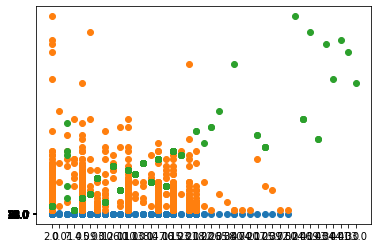

In [ ]:
plt.scatter(pdata['V1'],pdata['V2'])
plt.scatter(pdata['V1'],pdata['V3'])
plt.scatter(pdata['V2'],pdata['V3'])

In [ ]:
pdata[pdata.Target=='NO'].count()

V1        570
V2        570
V3        570
V4        570
V5        570
Target    570
dtype: int64

In [ ]:
print(pdata.V1.unique())
print(pdata.V2.unique())
print(pdata.V3.unique())
print(pdata.V4.unique())
print(pdata.V5.unique())

['2.0' '0.0' '?' '1.0' '4.0' '5.0' '9.0' '3.0' '12.0' '6.0' '11.0' '10.0'
 '13.0' '8.0' '14.0' '7.0' '16.0' '15.0' '23.0' '21.0' '18.0' '22.0'
 '26.0' '35.0' '38.0' '40.0' '74.0' '20.0' '17.0' '25.0' '39.0' '72.0']
['50.0' '13.0' '?' '20.0' '24.0' '12.0' '9.0' '46.0' '3.0' '10.0' '6.0'
 '5.0' '14.0' '11.0' '8.0' '16.0' '7.0' '2.0' '19.0' '4.0' '17.0' '1.0'
 '15.0' '22.0' '18.0' '38.0' '43.0' '34.0' '44.0' '26.0' '41.0' '21.0'
 '33.0']
[12500.  3250.  4000.  5000.  6000.  1000.  1750.  3000.  2250. 11500.
  5750.   750.  2500.  1500.  1250.  3500.  3750.  2750.  2000.   500.
  4750.  4250.   250.  5500.  4500.  9500. 10750.  8500. 11000.  6500.
 10250.  5250.  8250.]
[98. 28. 35. 45. 77.  4. 14. 22. 58. 47. 15. 11. 48. 49. 16. 40. 34. 21.
 26. 64. 57. 53. 69. 36.  2. 46. 52. 81. 29.  9. 74. 25. 51. 71. 23. 86.
 38. 76. 70. 59. 82. 61. 79. 41. 33. 10. 95. 88. 19. 37. 39. 78. 42. 27.
 24. 63. 43. 75. 73. 50. 60. 17. 72. 62. 30. 31. 65. 89. 87. 93. 83. 32.
 12. 18. 55.  3. 13. 54.]
['NEGAT

In [ ]:
pdata.loc[pdata.V1=='?','V1'].count()+pdata.loc[pdata.V2=='?','V2'].count()

10

In [ ]:
pdata.replace('?',np.nan,inplace=True)

In [ ]:
X_num=pdata.iloc[:,:4]
X_num

,V1,V2,V3,V4
0,2.0,50.0,12500.0,98.0
1,0.0,13.0,3250.0,28.0
2,NaN,NaN,4000.0,35.0
3,NaN,20.0,5000.0,45.0
4,1.0,24.0,6000.0,77.0
...,...,...,...,...
743,23.0,2.0,500.0,38.0
744,21.0,2.0,500.0,52.0
745,23.0,3.0,750.0,62.0
746,39.0,1.0,250.0,39.0


In [ ]:
imputer=SimpleImputer(missing_values=np.nan, strategy='median')
imputed_pdata=imputer.fit_transform(X_num)

In [ ]:
imputed_pdata

array([[2.00e+00, 5.00e+01, 1.25e+04, 9.80e+01],
       [0.00e+00, 1.30e+01, 3.25e+03, 2.80e+01],
       [8.00e+00, 4.00e+00, 4.00e+03, 3.50e+01],
       ...,
       [2.30e+01, 3.00e+00, 7.50e+02, 6.20e+01],
       [3.90e+01, 1.00e+00, 2.50e+02, 3.90e+01],
       [7.20e+01, 1.00e+00, 2.50e+02, 7.20e+01]])

In [ ]:
np.average(imputed_pdata[:,0])

9.552139037433156

In [ ]:
knn_imputer=KNNImputer(missing_values=np.nan,n_neighbors=3)
imputed_knn_pdata=imputer.fit_transform(X_num)

In [ ]:
imputed_knn_pdata

array([[2.00e+00, 5.00e+01, 1.25e+04, 9.80e+01],
       [0.00e+00, 1.30e+01, 3.25e+03, 2.80e+01],
       [8.00e+00, 4.00e+00, 4.00e+03, 3.50e+01],
       ...,
       [2.30e+01, 3.00e+00, 7.50e+02, 6.20e+01],
       [3.90e+01, 1.00e+00, 2.50e+02, 3.90e+01],
       [7.20e+01, 1.00e+00, 2.50e+02, 7.20e+01]])

In [ ]:
np.average(imputed_knn_pdata[:,0])

9.552139037433156

In [ ]:
mean_imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imp_pdata=mean_imputer.fit_transform(X_num)

In [ ]:
np.average(imp_pdata[:,1])

5.464333781965007

## GA

In [ ]:
X=pdata.iloc[:,:-1]
y=pdata.iloc[:,-1]

In [ ]:
print(X,y)

       V1    V2       V3    V4        V5
0     2.0  50.0  12500.0  98.0  NEGATIVE
1     0.0  13.0   3250.0  28.0  NEGATIVE
2       ?     ?   4000.0  35.0  NEGATIVE
3       ?  20.0   5000.0  45.0  NEGATIVE
4     1.0  24.0   6000.0  77.0  NEGATIVE
..    ...   ...      ...   ...       ...
743  23.0   2.0    500.0  38.0  NEGATIVE
744  21.0   2.0    500.0  52.0  NEGATIVE
745  23.0   3.0    750.0  62.0  NEGATIVE
746  39.0   1.0    250.0  39.0  NEGATIVE
747  72.0   1.0    250.0  72.0  NEGATIVE

[748 rows x 5 columns] 0      YES
1      YES
2      YES
3      YES
4       NO
      ... 
743     NO
744     NO
745     NO
746     NO
747     NO
Name: Target, Length: 748, dtype: object


In [ ]:
X=X.replace({'?':np.nan})

In [ ]:
imputer=SimpleImputer(strategy="mean")
sscaler=StandardScaler()
first_4_features=Pipeline([("selector",ColumnTransformer([("select_4","passthrough",[0,1,2,3])])),("imputer",imputer),("sscaler",sscaler)])

In [ ]:
last_feature=ColumnTransformer([("ordinal",OrdinalEncoder(),[4])])

In [ ]:
features=FeatureUnion([("first_four",first_4_features),("last",last_feature)])

In [ ]:
selector=variance_threshold=VarianceThreshold(threshold=0.1)

In [ ]:
pipe=Pipeline([("features",features),("selector",selector)])

In [ ]:
X_transformed=pipe.fit_transform(X)
X_transformed

array([[-9.38169390e-01,  7.70986653e+00,  7.62334626e+00,
         2.61563344e+00],
       [-1.18627754e+00,  1.30454949e+00,  1.28273826e+00,
        -2.57880900e-01],
       [ 0.00000000e+00, -1.53758496e-16,  1.79684161e+00,
         2.94705348e-02],
       ...,
       [ 1.66696622e+00, -4.26617275e-01, -4.30939574e-01,
         1.13782607e+00],
       [ 3.65183145e+00, -7.72850628e-01, -7.73675141e-01,
         1.93671355e-01],
       [ 7.74561598e+00, -7.72850628e-01, -7.73675141e-01,
         1.54832812e+00]])

In [ ]:
X_transformed.shape

(748, 4)

In [ ]:
X.shape

(748, 5)

In [ ]:
selector2=RFE(estimator=LogisticRegression(), n_features_to_select=2)

In [ ]:
selector2.fit(X_transformed,y)
selector2.support_

array([ True, False,  True, False])

In [ ]:
selector3=SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select=2, direction="forward")

In [ ]:
selector3.fit(X_transformed,y)
selector3.support_

array([False,  True, False,  True])

In [ ]:
selector4=SequentialFeatureSelector(estimator=LogisticRegression(),n_features_to_select=2,direction="backward")

In [ ]:
selector4.fit(X_transformed,y)
selector4.support_

array([False, False,  True,  True])